# Chap2 相関関係と主成分分析


![](https://m.media-amazon.com/images/I/51+dt08QnxL._SY346_.jpg)

# 2.1 データの前処理 (p9)

標準化

$$
\tilde{x} = \frac{x- \bar{x}}{s}  \ \ \ \tag{2.5}
$$

### プログラム 2.2 データを標準化する (p14)

In [66]:
import numpy as np
import scale

# 既存データと未知サンプルをndarray 型で定義します
X = np.array([[1, 2, 3],
			[4, 5, 6],
			[7, 8, 9]])

x = np.array([[10, 11, 12]])

# X を標準化します
Xscale, meanX, stdX = scale.autoscale(X)
print(Xscale)
print(meanX)
print(stdX)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
[4. 5. 6.]
[3. 3. 3.]


In [68]:
# 未知サンプルを標準化します
xscale = scale.scaling(x, meanX , stdX)
print(xscale)
# 標準化したサンプルを元のスケールに戻します．
xrescale = scale.rescaling(xscale , meanX , stdX)
print(xrescale)

[[2. 2. 2.]]
[[10. 11. 12.]]


### UnbiasedStandardScaler 不偏分散版 (from scratch)
- (ddof=1)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import StandardScaler

In [70]:
# 既存データと未知サンプルをndarray 型で定義します
X = np.array([[1, 2, 3],
			[4, 5, 6],
			[7, 8, 9]])

x = np.array([[10, 11, 12]])

In [71]:
class UnbiasedStandardScaler(TransformerMixin):
    def __init__(self):
        self.X_mean = None
        self.X_std = None
    def fit(self, X):
        self.X_mean = X.mean(axis=0)
        self.X_std = X.std(axis=0, ddof=1)
        return self
    def transform(self, X):
        return (X - self.X_mean)/self.X_std
    def inverse_transform(self, X):
        return X * self.X_std + self.X_mean

In [72]:
ubss = UnbiasedStandardScaler()
X_std = ubss.fit_transform(X)
X_std

array([[-1., -1., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

In [73]:
ubss.inverse_transform(X_std)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [74]:
print(ubss.X_mean)
print(ubss.X_std)

[4. 5. 6.]
[3. 3. 3.]


### sklearn.preprocessing.StandardScaler 標本分散版

- 標本分散 (ddof=0) 

- `ss.fit_transform(X)*np.sqrt(N-1/N)`
- `StandardScaler`の標準化は標本分散ベース
- 不偏分散ベースにするには、`np.sqrt((N-1)/N)`を乗じる

In [59]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [60]:
print(ss.mean_)
print(ss.var_, np.sqrt(ss.var_))

[4. 5. 6.]
[6. 6. 6.] [2.44948974 2.44948974 2.44948974]


In [61]:
ss.fit_transform(X)*np.sqrt(2/3)

array([[-1., -1., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

# 2.9 主成分分析の数値例

### プログラム 2.4 PCAの数値例 (P42)

In [86]:
import numpy as np
from pca import pca

np.set_printoptions(formatter={'float':'{: .4f}'.format})

data = [[2, 2], [1, -1], [-1, 1], [-2, -2]]
x = np.array(data)
P, T = pca(x)

print(P)
print(T)

[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
[[ 2.8284  0.0000]
 [ 0.0000 -1.4142]
 [-0.0000  1.4142]
 [-2.8284 -0.0000]]


### sklearn.decomposition.PCA

In [87]:
from sklearn.base import TransformerMixin
from sklearn.decomposition import PCA

In [88]:
data = [[2, 2], [1, -1], [-1, 1], [-2, -2]]
X = np.array( data)
X

array([[ 2,  2],
       [ 1, -1],
       [-1,  1],
       [-2, -2]])

In [89]:
pca = PCA()
pca.fit(X)

PCA()

In [90]:
pca.components_.T

array([[ 0.7071,  0.7071],
       [ 0.7071, -0.7071]])

In [91]:
pca.transform(X)

array([[ 2.8284,  0.0000],
       [-0.0000,  1.4142],
       [ 0.0000, -1.4142],
       [-2.8284, -0.0000]])

### MyPCA 固有値分解 (from scratch)

- 共分散
    - 平均化
    - 対称行列
- 固有値分解

In [92]:
class MyPCA(TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        self.X_cov = np.cov(X.T)
        self.Lambs, self.P = np.linalg.eig(self.X_cov)
        return self
    def transform(self, X):
        return X @ self.P
    def inverse_transform(self, X):
        return X @ np.linalg.inv(self.P)

In [93]:
mypca = MyPCA()
mypca.fit(X)
print(mypca.X_cov)
print(mypca.Lambs)
print(mypca.P)

[[ 3.3333  2.0000]
 [ 2.0000  3.3333]]
[ 5.3333  1.3333]
[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]


In [94]:
X_pca = mypca.fit_transform(X)

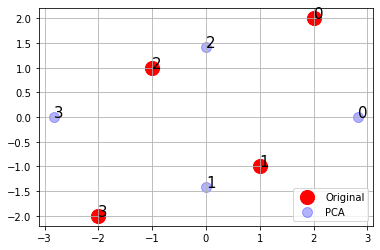

In [95]:
plt.scatter(X[:,0], X[:,1], c="red", s=200, label="Original")
for i, x in enumerate(X):
    plt.annotate(str(i), (x[0], x[1]), fontsize=15)
plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", s=100, alpha=0.3, label="PCA")
for i, x in enumerate(X_pca):
    plt.annotate(str(i), (x[0], x[1]), fontsize=15)
plt.legend(loc="lower right")
plt.grid()

In [19]:
mypca.inverse_transform(X_pca)

array([[ 2.,  2.],
       [ 1., -1.],
       [-1.,  1.],
       [-2., -2.]])

# 2.12 PCAと特異値分解 (p45)

## 特異値分解 (SVD)

- そもそも、固有値分解は正方行列でしか使えない
- 平均化しなくて、いきなり、固有値が求まる

### プログラム2.5 SVD を用いたPCA（pca_svd.py）(p47)

In [99]:
import numpy as np
def pca_svd(X):
    """
    SVD を用いて主成分分析を実行します．
    パラメータ
    ----------
    X: データ行列
    
     戻り値
     -------
     P: ローディング行列
     t: 主成分得点行列
     """
    
    # 行列を特異値分解します
    _, _, P = np.linalg.svd(X)
    
    # 主成分得点を計算します
    t = X @ P.T
    return P, t

In [100]:
data = [[2, 2], [1, -1], [-1, 1], [-2, -2]]
x = np.array(data)
pca_svd(x)

(array([[-0.7071, -0.7071],
        [-0.7071,  0.7071]]),
 array([[-2.8284, -0.0000],
        [ 0.0000, -1.4142],
        [-0.0000,  1.4142],
        [ 2.8284,  0.0000]]))

### 固有値分解でPCA

In [103]:
from pca import pca

pca(x)

(array([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]]),
 array([[ 2.8284,  0.0000],
        [ 0.0000, -1.4142],
        [-0.0000,  1.4142],
        [-2.8284, -0.0000]]))

### ランク落ちの矩形行列でのPCA

In [105]:
Y = np.array([[1,1,1,1],
              [2,2,2,2],
              [1,1,2,2],
              [2,2,4,4]])

np.linalg.matrix_rank(Y)

2

In [110]:
pca_svd(Y)

(array([[-0.3717, -0.3717, -0.6015, -0.6015],
        [-0.6015, -0.6015,  0.3717,  0.3717],
        [ 0.7071, -0.7071,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.7071,  0.7071]]),
 array([[-1.9465, -0.4595, -0.0000,  0.0000],
        [-3.8930, -0.9190, -0.0000,  0.0000],
        [-3.1495,  0.2840, -0.0000, -0.0000],
        [-6.2990,  0.5680, -0.0000, -0.0000]]))

In [106]:
pca_svd(Y)

(array([[-0.3717, -0.3717, -0.6015, -0.6015],
        [-0.6015, -0.6015,  0.3717,  0.3717],
        [ 0.7071, -0.7071,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.7071,  0.7071]]),
 array([[-1.9465, -0.4595, -0.0000,  0.0000],
        [-3.8930, -0.9190, -0.0000,  0.0000],
        [-3.1495,  0.2840, -0.0000, -0.0000],
        [-6.2990,  0.5680, -0.0000, -0.0000]]))

### $A=U\Sigma V^T$ の確認

In [107]:
U, s, VT = np.linalg.svd(Y)
U, s, VT

(array([[-0.2351, -0.3804,  0.8944, -0.0000],
        [-0.4702, -0.7608, -0.4472,  0.0000],
        [-0.3804,  0.2351,  0.0000, -0.8944],
        [-0.7608,  0.4702,  0.0000,  0.4472]]),
 array([ 8.2790,  1.2079,  0.0000,  0.0000]),
 array([[-0.3717, -0.3717, -0.6015, -0.6015],
        [-0.6015, -0.6015,  0.3717,  0.3717],
        [ 0.7071, -0.7071,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.7071,  0.7071]]))

In [112]:
# U * s @ VT
U @ np.diag(s) @ VT

array([[ 1.0000,  1.0000,  1.0000,  1.0000],
       [ 2.0000,  2.0000,  2.0000,  2.0000],
       [ 1.0000,  1.0000,  2.0000,  2.0000],
       [ 2.0000,  2.0000,  4.0000,  4.0000]])

In [20]:
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)
U, Sigma, VT

(array([[-7.07106781e-01,  0.00000000e+00],
        [-5.55111512e-17, -7.07106781e-01],
        [ 5.55111512e-17,  7.07106781e-01],
        [ 7.07106781e-01,  3.33066907e-16]]),
 array([4., 2.]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [21]:
U.shape, Sigma.shape, VT.shape

((4, 2), (2,), (2, 2))

In [22]:
U @ np.diag(Sigma) @ VT

array([[ 2.,  2.],
       [ 1., -1.],
       [-1.,  1.],
       [-2., -2.]])